## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results,mouse_metadata, on="Mouse ID" )
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Checking the number of mice.
ID_count = combined_df["Mouse ID"].nunique()
ID_count

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice1 = combined_df.loc[combined_df['Mouse ID'] == "g989"]
dup_mice1

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_df[combined_df['Mouse ID'] != 'g989']
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_data['Mouse ID'].nunique()
clean_count

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
group_df = clean_data.groupby('Drug Regimen')['Mouse ID'].nunique().reset_index()
group_df = group_df.rename(columns={"Mouse ID": "Count"})
group_df


,Drug Regimen,Count
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


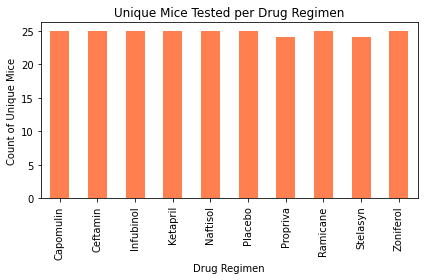

In [13]:
group_bar = group_df.plot(kind = 'bar',x = "Drug Regimen", y="Count", title="Unique Mice Tested per Drug Regimen", color = 'coral', legend = False)
group_bar.set_ylabel("Count of Unique Mice")
plt.tight_layout()

plt.savefig("figures/PandaBarChart.png")

plt.show()

In [14]:
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_df = clean_data.groupby('Drug Regimen')['Mouse ID'].nunique().reset_index()
drug_df = drug_df.rename(columns={"Mouse ID": "Mouse Population"})
drug_df

,Drug Regimen,Mouse Population
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


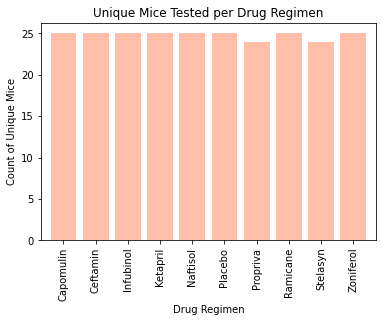

In [16]:
x_axis = np.arange(len(drug_df))
tick_locations = [value for value in x_axis]


# Create a list indicating where to write x labels and set figure size to adjust for space
plt.bar(x_axis, drug_df["Mouse Population"], color='coral', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_df["Drug Regimen"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_df["Mouse Population"])*1.05)

# # Set a Title and labels
plt.title("Unique Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Unique Mice")

# Save the figure
plt.savefig("figures/PyplotBarChart.png")
plt.show()

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_data.groupby('Sex')['Mouse ID'].nunique().reset_index()
gender_df = gender_df.rename(columns={"Mouse ID": "Gender Population"})
gender_df


,Sex,Gender Population
0,Female,123
1,Male,125


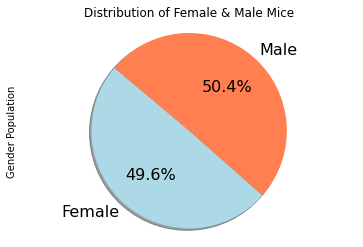

In [18]:
gender_df.plot(kind = 'pie', y = 'Gender Population', title = "Distribution of Female & Male Mice", startangle=140,
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["lightblue","coral"],legend =False, labels=gender_df["Sex"])

plt.axis("equal")
plt.savefig("figures/PandaPieChart.png")
plt.show()

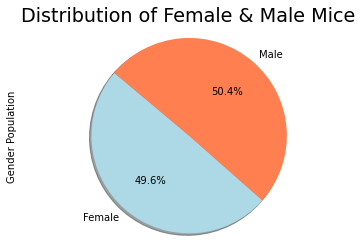

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = gender_df['Sex'].to_list()
populations = gender_df['Gender Population'].to_list()
colors = ["lightblue", "coral"]
explode = (0.1, 0)

plt.pie(populations, labels = genders, colors = colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of Female & Male Mice")
plt.ylabel("Gender Population")
plt.axis("equal")
plt.savefig("figures/PyplotPieChart.png")
plt.show()

In [20]:
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [ ]:
# Start by getting the last (greatest) timepoint for each mouse

In [75]:
mouse_id = clean_data.loc[: , ['Mouse ID', 'Timepoint']]
mouse_id.head()
# last_time = mouse_id.max()

# last_time.head()

,Mouse ID,Timepoint
0,b128,0
1,b128,5
2,b128,10
3,b128,15
4,b128,20


In [65]:
last_time = mouse_id.loc[:, mouse_group["Timepoint"]==]
last_time.head()

AttributeError: 'DataFrameGroupBy' object has no attribute 'loc'

In [ ]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# treatment_df = clean_data[clean_data['Drug Regimen'].isin(treatments)]
# treatment_df['Drug Regimen'].value_counts()

treatment_df.head()
# Start by getting the last (greatest) timepoint for each mouse
# last_timepoint = treatment_df.loc[treatment_df.groupby('Mouse ID')['Timepoint'].agg(pd.Series.idxmax)]
# sorted_df = last_timepoint.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
# last_timepoint.head().reset_index
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
907,a203,45,67.973419,2,Infubinol,Female,20,23
289,a251,45,65.525743,1,Infubinol,Female,21,25
1487,a275,45,62.999356,3,Ceftamin,Female,20,28
470,a411,45,38.407618,1,Ramicane,Male,3,22
480,a444,45,43.047543,0,Ramicane,Female,10,25


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [56]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
